# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

## Задание 1

#### Считываем данные

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
data = pd.read_csv('weights.csv', index_col='Index')

#### [2]. Посмотрите на первые 5 записей с помощью метода head Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода plot Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

In [67]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


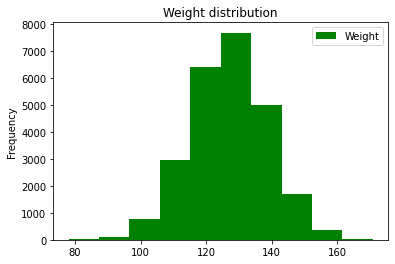

In [68]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight distribution')

In [69]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [70]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

#### [3]. Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод pairplot библиотеки Seaborn.

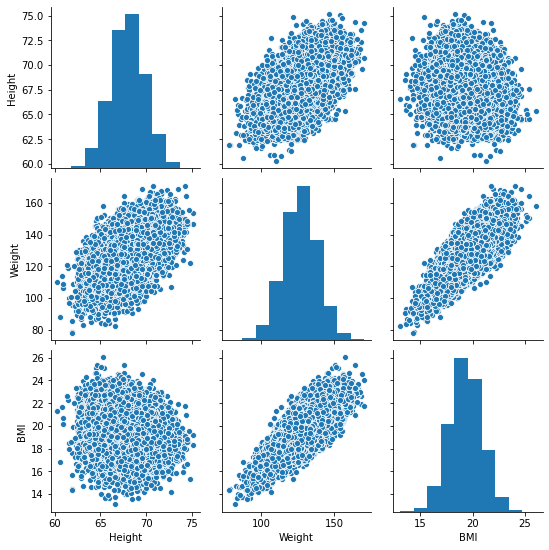

In [71]:
sns.pairplot(data)

#### [4]. Создайте в DataFrame data новый признак weight_category, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод boxplot библиотеки Seaborn и метод apply Pandas DataFrame. Подпишите ось y меткой «Рост», ось x – меткой «Весовая категория».

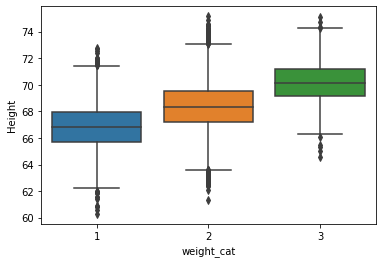

In [10]:
def weight_category(weight):
    if weight < 120: 
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)

sns.boxplot(x="weight_cat", y="Height", data=data)

#### [5]. Постройте scatter plot зависимости роста от веса, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

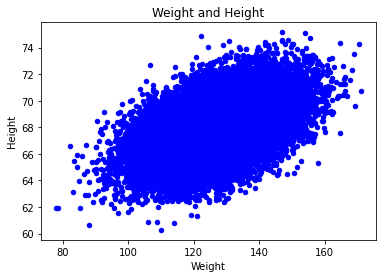

In [11]:
data.plot(x='Weight', y='Height', kind='scatter', 
           color='blue',  title='Weight and Height')

## Задание 2

#### [6]. Напишите функцию, которая по двум параметрам  w0  и  w1  вычисляет квадратичную ошибку приближения зависимости роста  y  от веса  x  прямой линией  y=w0+w1∗x :

In [26]:
def error(w1, w0=50.0):
    x = data['Weight']
    y = data['Height']
    result = 0
    for i in range(x.shape[0]):
        result += (y.iloc[i] - (w0 + w1 * x.iloc[i])) ** 2
                   
    return result

#### [7]. Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ( w0,w1)=(60,0.05)  и ( w0,w1)=(50,0.16) . Используйте метод plot из matplotlib.pyplot, а также метод linspace библиотеки NumPy. Подпишите оси и график.

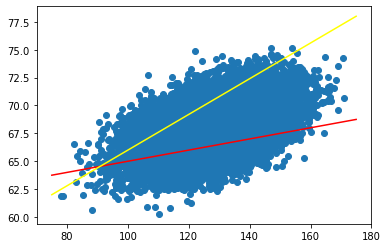

In [76]:
plt.scatter(data['Weight'], data['Height'])

def plot(w0, w1, color):
    x = np.linspace(75, 175, 100)
    y = list(map(lambda x: w0+w1*x, x))
    plt.plot(x, y, color=color)
    
plot(60, 0.05, 'red')
plot(50, 0.16, 'yellow')
plt.show()

#### [8]. Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра  w1  при  w0  = 50. Подпишите оси и график.

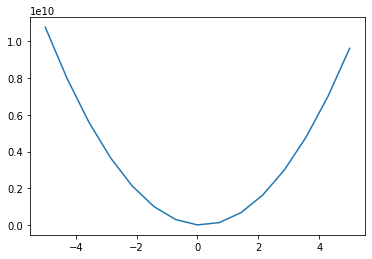

In [29]:
w1 = np.linspace(-5, 5, 15)
errors = list(map(lambda p: error(p), w1))

plt.plot(w1, errors)

#### [9]. С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра  w1  в диапазоне [-5,5]. 

In [33]:
from scipy.optimize import minimize_scalar

min_x = minimize_scalar(error, bounds=[-5, 5]).x

print(f'Значение ошибки минимально при w1={min_x}')

Значение ошибки минимально при w1=0.14109203728834385


#### [9] Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ( w0 ,  w1 ) = (50,  w1_opt ), где  w1_opt  – найденное в п. 8 оптимальное значение параметра  w1 .

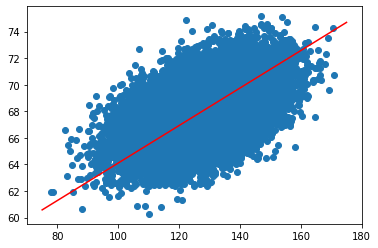

In [39]:
plt.scatter(data['Weight'], data['Height'])

x = np.linspace(75, 175)
y = w0+min_x*x
plt.plot(x, y, color='red')
plt.show()

In [41]:
from mpl_toolkits.mplot3d import Axes3D

#### [10]. Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров  w0  и  w1 . Подпишите ось  x  меткой «Intercept», ось  y  – меткой «Slope», a ось  z  – меткой «Error».

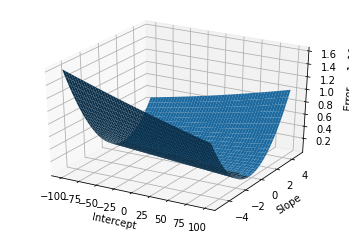

In [44]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-100, 100, 1)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = error(Y, X)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

#### [11]. С помощью метода minimize из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра  w0  в диапазоне [-100,100] и  w1  - в диапазоне [-5, 5]. Начальная точка – ( w0 ,  w1 ) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize).

In [53]:
from scipy.optimize import minimize 

def sqrt_error(p):
    x = data['Weight']
    y = data['Height']
    result = 0
    for i in range(x.shape[0]):
        result += (y.iloc[i] - (p[0] + p[1] * x.iloc[i])) ** 2
                   
    return result

mins = minimize(sqrt_error, x0=(0, 0), bounds=((-100,100), (-5,5)), method='L-BFGS-B').x
min_w0 = mins[0]
min_w1 = mins[1]

print(f'Минииальное значение ошибки достигается при w0={min_w0} и w1={min_w1}')

Минииальное значение ошибки достигается при w0=57.57180515730271 и w1=0.08200626390296213


#### [11] Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров  w0  и  w1 . Подпишите оси и график.

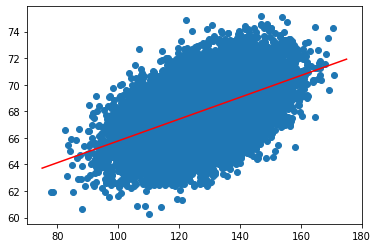

In [77]:
plt.scatter(data['Weight'], data['Height'])

x = np.linspace(75, 175)
y = min_w0+min_w1*x
plt.plot(x, y, color='red')
plt.show()